# Lab  #1 - Linear Regression

First and Last Name: Janakan Sivaloganathan

Student ID: 500960836

Lab objective: Implement the Gradient Descent algorithm for solving linear regression problems. Please note the syntactic development was purposefully done to showcase and explain direct mathematical translation to code (e.g., summation functions to for loops, etc.). This code can obviously be optimized with numpy, but it would be less clear when reviewing (may also factor into minute calculation differences).

As recommended from the laboratory, text fields were only used to answer complementary questions.

In [87]:
"""Dependancies"""

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [88]:
"""Data preparation and exploratory data analysis"""

# Import student marks data set (no missing values)
dataset = pd.read_csv('https://raw.githubusercontent.com/yoga-suhas-km/Intelligent_systems/main/marks_dataset.csv')
print("Dataset description")
print(dataset.describe())
print("\nDataset information")
print(dataset.info())
print("\nFirst 5 values")
print(dataset.head())

# Additional call to view standard deviation and mean values
midterm_mean = dataset['Midterm mark'].mean()
mid_std = dataset['Midterm mark'].std()
final_mean = dataset['Final mark'].mean()
final_std = dataset['Final mark'].std()
print("\nMidterm Mean:", midterm_mean)
print("Final Mean:",final_mean)
print("Midterm Standard Deviation:", mid_std)
print("Final Standard Deviation:",final_std)

Dataset description
       Midterm mark  Final mark
count    100.000000  100.000000
mean      48.959000   72.735000
std        9.746495   16.658249
min       25.100000   31.700000
25%       41.550000   60.775000
50%       49.600000   72.150000
75%       56.750000   83.175000
max       70.300000  118.600000

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Midterm mark  100 non-null    float64
 1   Final mark    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None

First 5 values
   Midterm mark  Final mark
0          32.5        31.7
1          53.4        68.8
2          61.5        62.6
3          47.5        71.5
4          59.8        87.2

Midterm Mean: 48.959
Final Mean: 72.735
Midterm Standard Deviation: 9.746494785617061
Final Standard Deviation: 16.658248631676365


In [89]:
def standardize(feature_vector):
    """Standardization (Normalization)"""
    mean_avg = feature_vector.mean()
    std_avg = feature_vector.std()
    return (feature_vector - mean_avg)/std_avg

In [90]:
def cost(slope, y_intercept, feature_vector, target_vector):
  """Error (Cost function)"""
  sum = 0
  for i in range(len(feature_vector)):
    sum += (target_vector[i] - (slope*feature_vector[i] + y_intercept))**2
  return sum/len(feature_vector) # assuming the length of the feature vector is > 0


In [91]:
def derive_slope_derivative(slope, y_intercept, feature_vector, target_vector):
  """Gradient Partial Derivative (Slope)"""
  sum = 0
  for i in range(len(feature_vector)):
    sum += -1*feature_vector[i]*(target_vector[i] - (slope*feature_vector[i] + y_intercept))
  return 2*sum/len(feature_vector) # assuming the length of the feature vector is > 0

def derive_y_intercept_derivative(slope, y_intercept, feature_vector, target_vector):
  """Gradient Partial Derivative (y-intercept)"""
  sum = 0
  for i in range(len(feature_vector)):
    sum += -1*(target_vector[i] - (slope*feature_vector[i] + y_intercept))
  return 2*sum/len(feature_vector) # assuming the length of the feature vector is > 0


In [92]:
def update_slope(slope, y_intercept, learning_rate, feature_vector, target_vector):
  """Updating slope using learning rate α"""
  return slope - learning_rate*derive_slope_derivative(slope, y_intercept, feature_vector, target_vector)

def update_y_intercept(slope, y_intercept, learning_rate, feature_vector, target_vector):
  """Updating y-intercept using learning rate α"""
  return y_intercept - learning_rate*derive_y_intercept_derivative(slope, y_intercept, feature_vector, target_vector)


In [93]:
def gradient_descent(slope, y_intercept, learning_rate, feature_vector, target_vector):
  """Core hyperparameter updator"""
  new_slope = update_slope(slope, y_intercept, learning_rate, feature_vector, target_vector)
  new_y_intercept = update_y_intercept(slope, y_intercept, learning_rate, feature_vector, target_vector)
  return new_slope, new_y_intercept

def gradient_descent_sim(m, b, alpha, iterations, feature_vector, target_vector):
  """Gradient descent simulation function"""
  slope_itr = m  # Updatable variable per iteration
  y_intercept_itr = b  # Updatable variable per iteration
  learning_rate = alpha
  error_rates = []  # Tracking the costs for each iteration
  for i in range(iterations):
    updated_slope, updated_y_intercept = gradient_descent(slope_itr, y_intercept_itr, learning_rate, feature_vector, target_vector)
    error = cost(updated_slope, updated_y_intercept, feature_vector, target_vector)
    error_rates.append(error)
    slope_itr = updated_slope
    y_intercept_itr = updated_y_intercept

  print(f"Updated slope value: {slope_itr} after {iterations} iterations")
  print(f"Updated y-intercept value: {y_intercept_itr} after {iterations} iterations")
  plt.plot(feature_vector, target_vector, '.', label="data points")
  linear_regress = slope_itr*(feature_vector)+y_intercept_itr
  plt.plot(feature_vector, linear_regress, label=f"regression line after {iterations} iterations")
  plt.xlabel("Midterm Mark")
  plt.ylabel("Final Mark")
  plt.title(f"Final mark predictions ({iterations} iterations)")
  plt.legend()
  plt.show()

  if iterations > 1:
    # Error function
    plt.plot(np.arange(iterations), error_rates)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.show()

In [94]:
"""Initialization of hyperparameters"""

m = -0.5
b = 0
alpha = 0.0001

feature_vector = dataset['Midterm mark']
target_vector = dataset['Final mark']

st_feature_vector = standardize(dataset['Midterm mark'])
st_target_vector = standardize(dataset['Final mark'])

Updated slope value: -0.5 after 0 iterations
Updated y-intercept value: 0 after 0 iterations


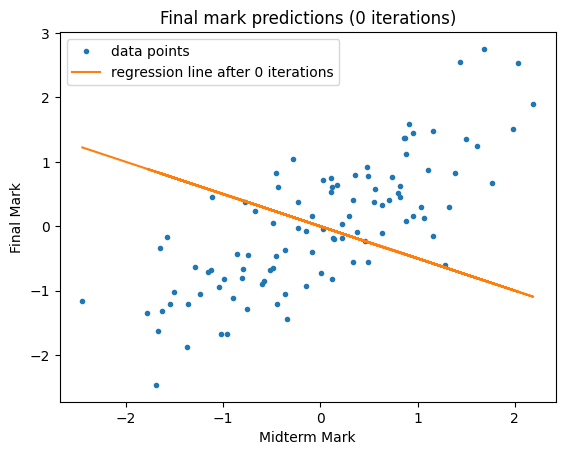

In [95]:
# Initial regression line (with standardization)
gradient_descent_sim(m, b, alpha, 0, st_feature_vector, st_target_vector)

Updated slope value: -0.47478346812862643 after 101 iterations
Updated y-intercept value: -2.6485480475457733e-18 after 101 iterations


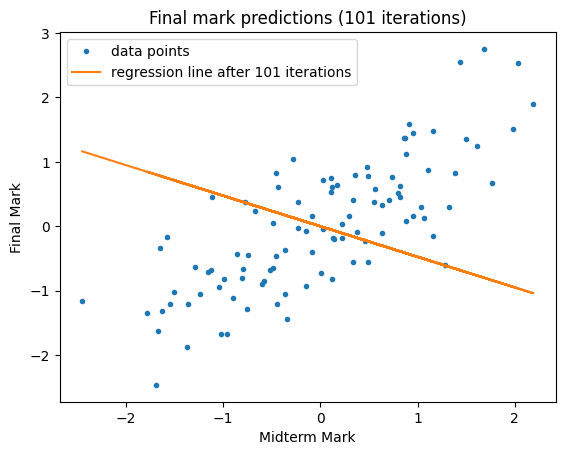

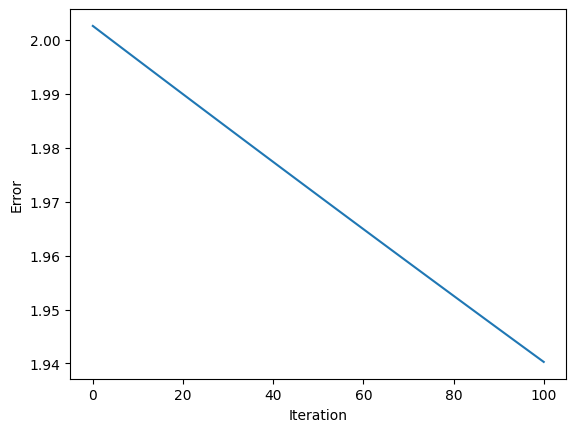

In [96]:
# 100 iterations of updating slope and y-intercept (First display + 100 updates = 101) (with standardization)
gradient_descent_sim(m, b, alpha, 101, st_feature_vector, st_target_vector)

Updated slope value: -0.0833778791612065 after 2001 iterations
Updated y-intercept value: -2.2117419007372578e-17 after 2001 iterations


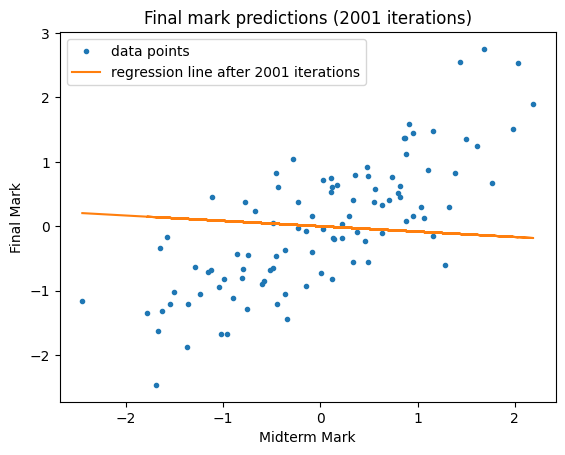

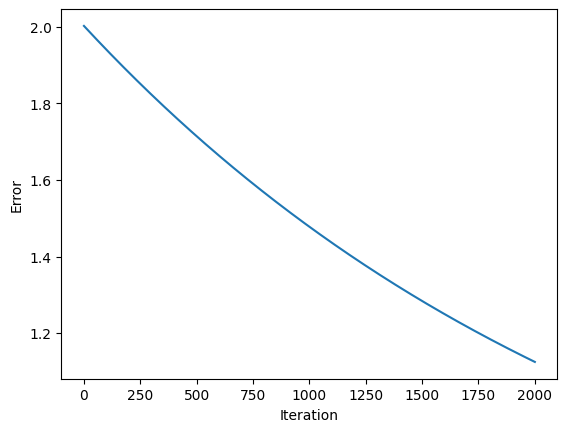

In [97]:
# 2000 iterations of updating slope and y-intercept (First display + 2000 updates = 2001) (with standardization)
gradient_descent_sim(m, b, alpha, 2001, st_feature_vector, st_target_vector)

Updated slope value: -0.5 after 0 iterations
Updated y-intercept value: 0 after 0 iterations


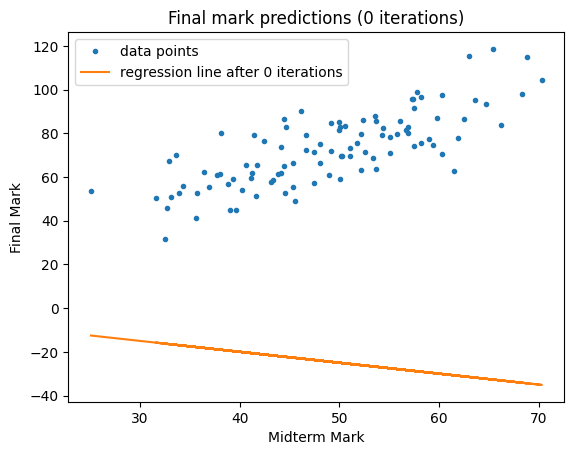

In [98]:
# Initial regression line (without standardization)
gradient_descent_sim(m, b, alpha, 0, feature_vector, target_vector)

Updated slope value: 1.478571574189093 after 101 iterations
Updated y-intercept value: 0.04496549418775084 after 101 iterations


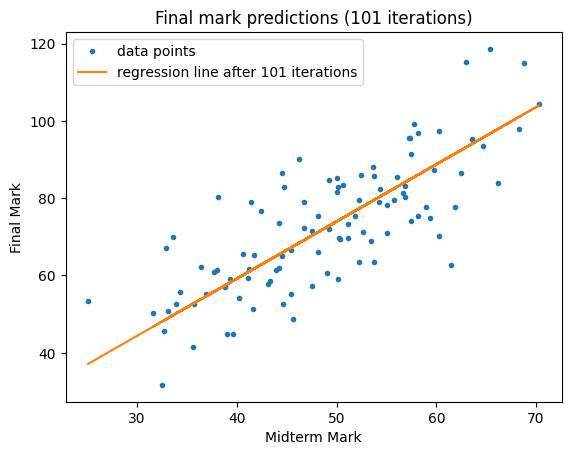

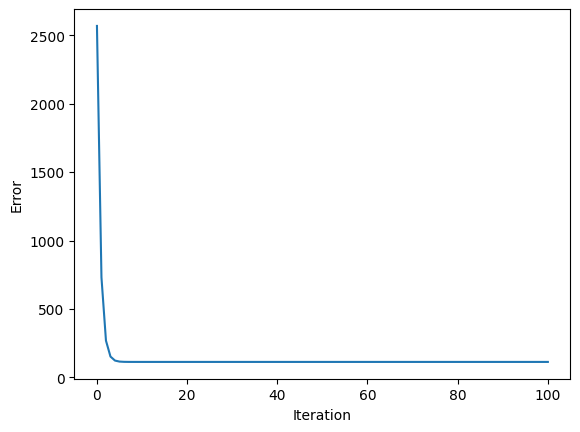

In [99]:
# 100 iterations of updating slope and y-intercept (First display + 100 updates = 101) (without standardization)
gradient_descent_sim(m, b, alpha, 101, feature_vector, target_vector)

Updated slope value: 1.476342138662747 after 2001 iterations
Updated y-intercept value: 0.1583971811422247 after 2001 iterations


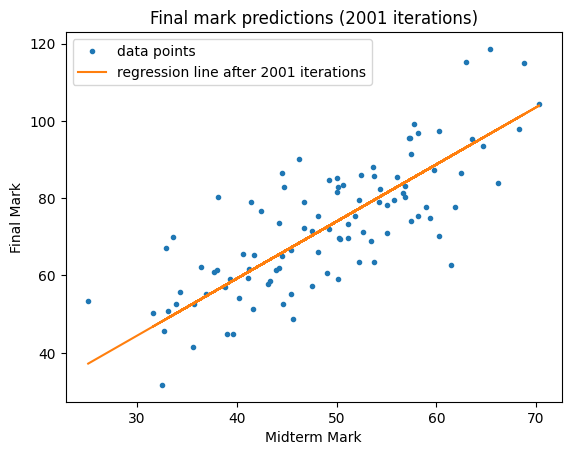

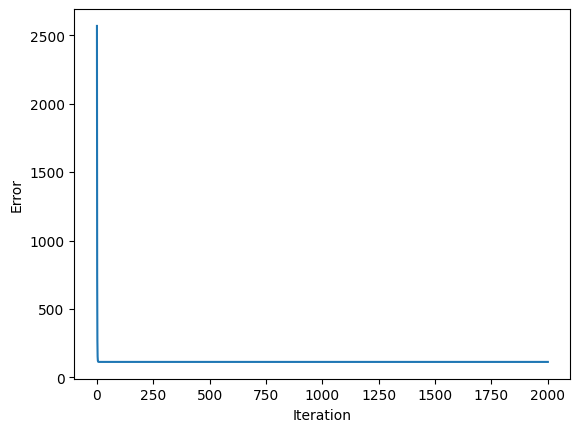

In [100]:
# 2000 iterations of updating slope and y-intercept (First display + 2000 updates = 20001) (without standardization)
gradient_descent_sim(m, b, alpha, 2001, feature_vector, target_vector)

The score of the model is: 0.5982684385776686.
The coef of the model is: [[1.32199232]].
The intercept of the model is: [8.01157814].
The model predictions for the same values are:
 X =
 [[32.5]
 [53.4]
 [61.5]
 [47.5]
 [59.8]
 [55.1]
 [52.2]
 [39.3]
 [48.1]
 [52.6]
 [45.4]
 [54.4]
 [44.2]
 [58.2]
 [56.7]
 [49. ]
 [44.7]
 [60.3]
 [45.6]
 [38.8]
 [66.2]
 [65.4]
 [47.5]
 [41.6]
 [51.8]
 [59.4]
 [57.3]
 [63.6]
 [46.7]
 [50.6]
 [52.2]
 [35.6]
 [42.4]
 [58.2]
 [57.5]
 [45.4]
 [61.9]
 [33.1]
 [36.4]
 [37.7]
 [44.6]
 [43.3]
 [50.1]
 [43.9]
 [63. ]
 [32.7]
 [40.2]
 [53.6]
 [33.9]
 [64.7]
 [38.1]
 [44.5]
 [40.6]
 [41.7]
 [51.1]
 [55.1]
 [41.4]
 [62.5]
 [49.2]
 [41.1]
 [41.2]
 [50.2]
 [52.4]
 [50.1]
 [33.6]
 [39.6]
 [56.1]
 [57.4]
 [60.3]
 [35.7]
 [31.6]
 [53.7]
 [46.7]
 [43.1]
 [70.3]
 [44.5]
 [57.5]
 [36.9]
 [55.8]
 [39. ]
 [56.9]
 [56.9]
 [34.3]
 [59. ]
 [57.8]
 [54.3]
 [51.1]
 [50.3]
 [44.2]
 [38. ]
 [32.9]
 [53.7]
 [68.8]
 [46.2]
 [68.3]
 [50. ]
 [49.2]
 [50. ]
 [48.1]
 [25.1]]
 predictions

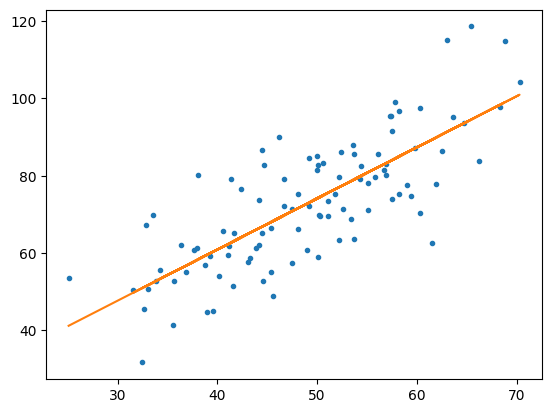

In [101]:
"""Verification using pre-built libraries"""

feature_vector = feature_vector.values.reshape(-1,1)
target_vector = target_vector.values.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg_model = lin_reg.fit(feature_vector,target_vector)
model_score = lin_reg_model.score(feature_vector, target_vector)

log_message = f'The score of the model is: {model_score}.'
print(log_message)
log_message = f'The coef of the model is: {lin_reg_model.coef_}.'
print(log_message)
log_message = f'The intercept of the model is: {lin_reg_model.intercept_}.'
print(log_message)

model_predict = lin_reg_model.predict(feature_vector)
log_message = f'The model predictions for the same values are:\n X =\n {feature_vector}\n predictions = \n ${model_predict}.'
print(log_message)

plt.plot(feature_vector,target_vector,'.')
plt.plot(feature_vector, model_predict)
plt.show()

# https://github.com/tofighi/MachineLearning/blob/master/Univariate_Linear_Regression.ipynb

#### Q1: Write your observation by changing the learning rate to 0.1. Include error plots while explaining your observation.




<ipython-input-90-401f848ba74b>:5: RuntimeWarning: overflow encountered in square
  sum += (target_vector[i] - (slope*feature_vector[i] + y_intercept))**2


Updated slope value: [4.6077438e+272] after 101 iterations
Updated y-intercept value: [9.05625932e+270] after 101 iterations


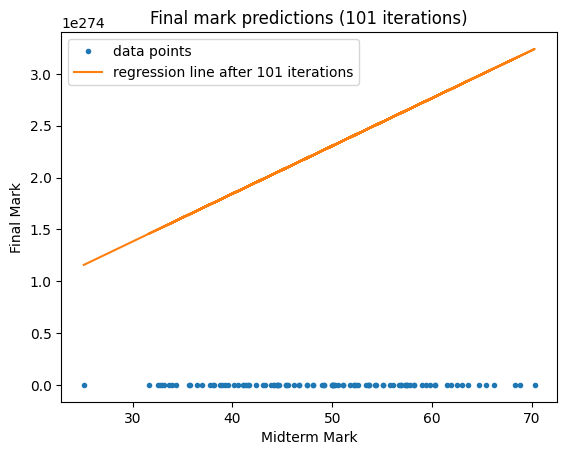

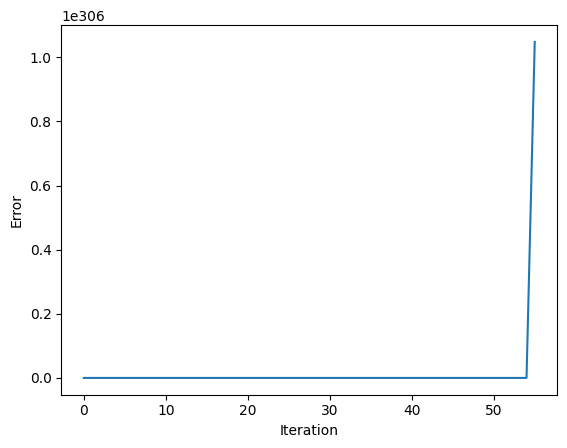

In [102]:
# Initialize alpha (learning rate) to 0.1
# Analsis 1 using a smaller sample set of 100 iterations
gradient_descent_sim(m, b, 0.1, 101, feature_vector, target_vector)

Updated slope value: [6.02418484e+13] after 5 iterations
Updated y-intercept value: [1.18401939e+12] after 5 iterations


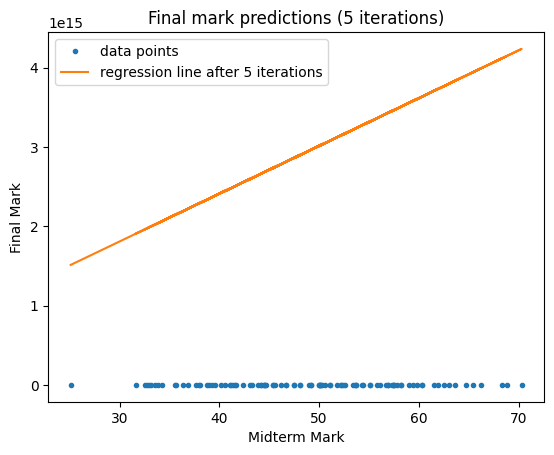

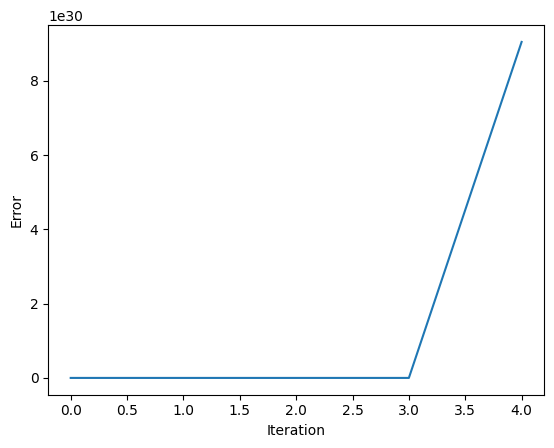

In [103]:
# Analsis 2 using a smaller sample set of 4 iterations (0 + 4 = 5)
gradient_descent_sim(m, b, 0.1, 5, feature_vector, target_vector)

Updated slope value: 0.35094251289169515 after 5 iterations
Updated y-intercept value: 3.552713678800498e-18 after 5 iterations


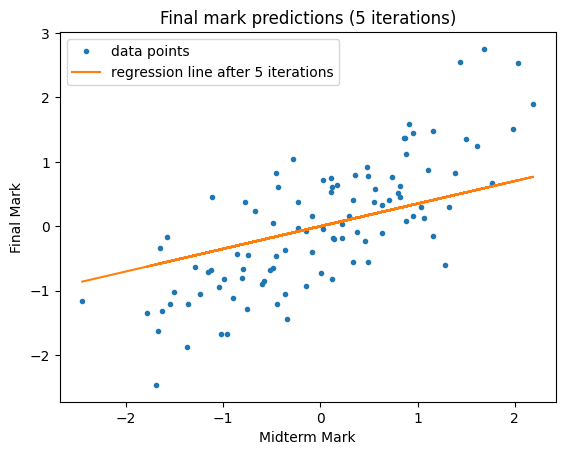

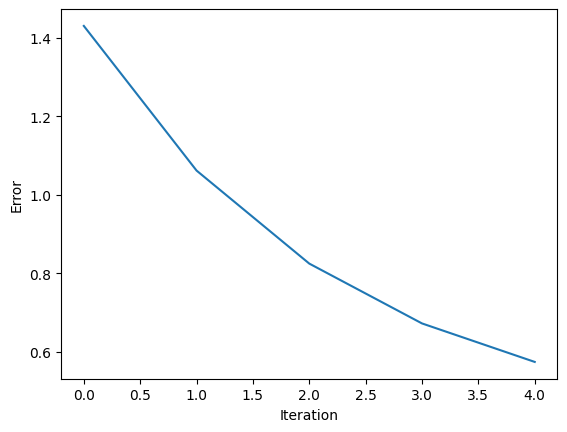

In [104]:
# Analsis 3 using a smaller sample set of 4 iterations (with standardization)
gradient_descent_sim(m, b, 0.1, 5, st_feature_vector, st_target_vector)

By changing the learning rate (alpha) to 0.1 and running the experiment for 100 and 4 sample steps respectively, the plots showcase that the linear regression was very volatile in its predicted path concerning the data points provided. Learning rate is a parameter that controls how quickly the model is adapted to the problem. In this case, a high learning rate of 0.1 presents that lower steps are needed to fit the regression, this is displayed as in the third step, the iteration vs error chart diverges to a high error value (which is also the reason for the outputted overflow errors). The pattern that was displayed after a couple of trials and error was the smaller the learning rate, the more epochs were required to ensure that the small incremental descents were effective. Overall, setting the learning rate to 0.1 made our linear regression model unstable (overshooting) deviating entirely from the data points, this showcases that a variety of parameters must be configured and adjusted for optimal performance.

#### Q2: Investigate the effect of standardization.

From an analysis of the charts presenting the simulation of 100 and 2000 steps of gradient descent, it is evident that standardization was not effective in predicting a linear regression for the problem. From an analysis of the graphs, the zero-mean value average prevents negative values of the independent variable or features in this case. When this interval of data was removed, the performance of the linear regression model was greatly improved. There are a variety of reasons why this happened, the negative values introduced by the features would have proposed instability when performing numeric calculations as the average has taken the positive values only. Additionally, the learning rate was smaller, thus more steps were required to be passed for a more improved outcome (as presented by the standardized experiments for 100 and 2000 iterations) so more information was provided with non-standardization.

From theory, standardization is often beneficial when features have different scales to help the convergence faster. There are several reasons why standardization would have been better, for example, if the feature scaling of our data set were more volatile then standardizing would have improved performance. Additionally, since the characteristics of the data set were not that extraneous in terms of its deviation (9 and 16 for midterm and final marks respectively) standardization wouldn't have much of an improvement effect. Lastly, the learning rate that was initially experimented with (0.0001) is very small and the initial graphs showcase that the regression model converges slowly, so the learning rate wasn't optimal. The experiment below proves that with a better learning rate, the standardized dataset would have been well-fitted as well.

Updated slope value: 0.6045212128527843 after 101 iterations
Updated y-intercept value: 9.273692924693932e-17 after 101 iterations


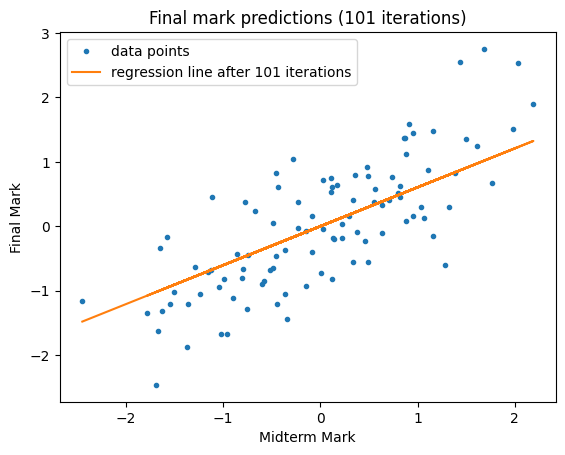

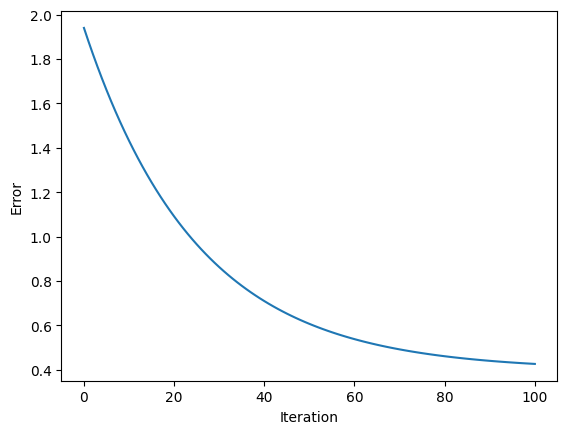

In [105]:
# 100 iterations of updating slope and y-intercept using a higher learning rate value (First display + 100 = 101) (with standardization)
gradient_descent_sim(m, b, 0.01, 101, st_feature_vector, st_target_vector)